In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../data.csv")

In [4]:
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# Normal KNN Model

In [21]:
x = df.iloc[:,1:14].values
y = df.iloc[:,-1].values

In [34]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
    test_size=0.25, random_state= 20)

In [35]:
classifier= KNeighborsClassifier(n_neighbors=4, weights='distance', metric='minkowski')  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_val)  

### Validation

In [36]:
print("KNN Validation classifier results:")
print("Accuracy:", metrics.accuracy_score(y_val , y_pred))
print("Precision:", metrics.precision_score(y_val , y_pred))
print("F1 score:",metrics.f1_score(y_val , y_pred))
print("Recall:", metrics.recall_score(y_val , y_pred))
print("ROC score:", metrics.roc_auc_score(y_val , y_pred))

KNN Validation classifier results:
Accuracy: 0.9595375722543352
Precision: 0.9333333333333333
F1 score: 0.8
Recall: 0.7
ROC score: 0.8467320261437908


### Testing

In [37]:
y_pred2 = classifier.predict(x_test)  

In [45]:
print("KNN classifier results:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred2))
print("Precision:", metrics.precision_score(y_test , y_pred2))
print("F1 score:",metrics.f1_score(y_test , y_pred2))
print("Recall:", metrics.recall_score(y_test , y_pred2))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred2))

KNN classifier results:
Accuracy: 0.9248554913294798
Precision: 0.8421052631578947
F1 score: 0.7111111111111111
Recall: 0.6153846153846154
ROC score: 0.7974882260596546


### ROC/AUC Curves

In [41]:
y_pred_proba = classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

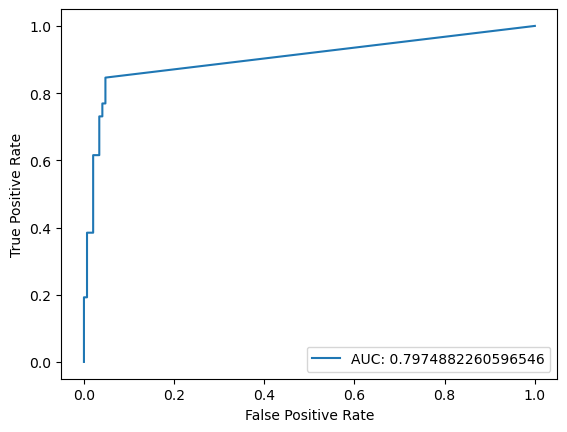

In [57]:
plt.plot(fpr,tpr, label="AUC: "+ str(metrics.roc_auc_score(y_test , y_pred2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Hyperparameters tunning

### Testing

In [8]:
print("KNN classifier results:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred))
print("Precision:", metrics.precision_score(y_test , y_pred))
print("F1 score:",metrics.f1_score(y_test , y_pred))
print("Recall:", metrics.recall_score(y_test , y_pred))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred))

KNN classifier results:
Accuracy: 0.9826589595375722
Precision: 0.9523809523809523
F1 score: 0.9302325581395349
Recall: 0.9090909090909091
ROC score: 0.9512341962673089


## Cross Validation

In [59]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
#print(‘cv_scores mean:{}’.format(np.mean(cv_scores)))
print(np.mean(cv_scores))

[0.84393064 0.89595376 0.93063584 0.91860465 0.94767442]
0.9073598601962629


In [60]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i,).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.9132948 , 0.9017341 , 0.92485549, 0.89017341, 0.89595376,
       0.89595376, 0.9017341 , 0.89017341, 0.89017341, 0.88439306,
       0.90751445, 0.89017341, 0.9017341 , 0.89595376, 0.9017341 ,
       0.89595376, 0.89595376, 0.88439306, 0.89595376, 0.89017341])

## Tunning

In [61]:
grid_params = { 'n_neighbors' : [3,4,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [62]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [63]:
g_res.best_score_

0.9477976430523816

In [64]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}